Work with http://neuralnetworksanddeeplearning.com/

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import random

# Chapter 1

In [113]:
def sigmoid(z):
    
    return 1./(1. + np.exp(-z))

def sigmoid_vector(w,x,b):
    
    return 1./(1. + np.exp(-1 * np.sum(w * x) - b))

def sigmoid_prime(z):
    
    return sigmoid(z) * (1 - sigmoid(z))

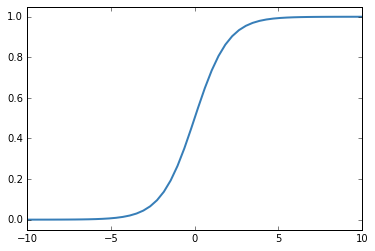

In [114]:
# Plot behavior of sigmoid. Continuous symmetric function, 
# asymptotically bounded by [0,1] in x = [-inf, inf]

x = np.linspace(-10,10)
plt.plot(x,sigmoid(x))
plt.ylim(-0.05,1.05);

In [21]:
# Test the vectorized output

w = np.array([1,2,3])
x = np.array([0.5,0.5,0.7])
b = 0

print sigmoid_vector(w,x,b)

0.973403006423


## Exercises

Take all the weights and biases in a network of **perceptrons** and multiply them by a positive constant $c > 0$. Show that the behavior of the network doesn't change. 

Input: $[x_1,x_2,\ldots,x_j]$

Old behavior

- Weights: $[w_1,w_2,\ldots,w_j]$

- Bias: $b$

Perceptron output: 

- output = 0 if $w \cdot x + b \leq 0$
- output = 1 if $w \cdot x + b > 0$


New input: 

- $w_\mathrm{new} = [c w_1,c w_2,\ldots,c w_j]$

- $b_\mathrm{new} = c b$

New output of the perceptron:

$w_\mathrm{new} \cdot x + b_\mathrm{new} = c w \cdot x + c b = c (w \cdot x + b)$.  

This is just a positive scaling, so $w_\mathrm{new} \cdot x + b_\mathrm{new} = w \cdot x + b$ at 0 and keeps the same sign on either side since $c > 0$. So the behavior of the perceptron network doesn't change.

Take a network of perceptrons and fix the input $\boldsymbol{x}$. Assume $\boldsymbol{w}\cdot\boldsymbol{x} + b \neq 0$ for all perceptrons. 

Original output:

- 0 if $(w \cdot x + b) < 0$
- 1 if $(w \cdot x + b) > 0$


Replace perceptrons with sigmoid functions and multiply both weights and biases by a constant $c > 0$. 

- $w_\mathrm{new} = [c w_1,c w_2,\ldots,c w_j]$

- $b_\mathrm{new} = c b$

New output:

$\sigma[c\boldsymbol{w},\boldsymbol{x},c b] \equiv \frac{1}{1 + \exp{\left(-\sum_j{(c w_j) x_j} - c b\right)}} = \frac{1}{1 + \exp{\left(c(-\sum_j{w_j x_j} - b)\right)}}$

As $c \rightarrow \infty$, the term $\exp{\left(c(-\sum_j{w_j x_j} - b)\right)}$ becomes $\infty$ if $(-\sum_j{w_j x_j} - b) > 0$, and so $\sigma \rightarrow 0$. This is equivalent to $(\sum_j{w_j x_j} + b) < 0$, or the same as the first output of the perceptron. Similarly, if $(-\sum_j{w_j x_j} - b) < 0$, then the term goes to 0 and $\sigma \rightarrow 1$. So the behavior of the sigmoid network is the same as perceptrons is the same for very large $c$. 

If $w \cdot x + b = 0$ for one of the perceptrons, then $\sigma=1/2$ regardless of the value of $c$. So the sigmoid approximation will fail to match the perceptron output. 

**Design a set of weights and biases such that digits are converted to their bitwise representation.**

In [79]:
# One set of possible weights and a bias; infinite amount
# of legal combinations

digits = np.identity(10) * 0.99 + 0.005

weights = np.ones((10,4)) * -1

weights[1::2,0] = 3
weights[2::4,1] = 3
weights[3::4,1] = 3
weights[4:8,2] = 3
weights[8:10,3] = 3
weights[0,1:3] = -2

bias = -2

print "Weights: \n{}".format(weights)

print "Bias: {}".format(bias)

print "Bitwise output: \n{}".format((np.sign(np.dot(digits,weights) + bias).astype(int) + 1) / 2)

Weights: 
[[-1. -2. -2. -1.]
 [ 3. -1. -1. -1.]
 [-1.  3. -1. -1.]
 [ 3.  3. -1. -1.]
 [-1. -1.  3. -1.]
 [ 3. -1.  3. -1.]
 [-1.  3.  3. -1.]
 [ 3.  3.  3. -1.]
 [-1. -1. -1.  3.]
 [ 3. -1. -1.  3.]]
Bias: -2
Bitwise output: 
[[0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 1 0 0]
 [0 0 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [1 1 1 0]
 [0 0 0 1]
 [1 0 0 1]]


In [139]:
# Initialize the network object

class Network(object):
    
    def __init__(self,sizes):
        # Initialize the Network object with random (normal) biases, weights
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y,1) for y in sizes[1:]]
        self.weights = [np.random.randn(y,x) for x,y in zip(sizes[:-1],sizes[1:])]

    def feedforward(self,a):
        # Return the output of the network
        
        for b,w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w,a) + b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size,
           eta, test_data=None):
        
        if test_data:
            n_test = len(test_data)
        n = len(training_data)
        
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in xrange(0,n,mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,eta)
            if test_data:
                print "Epoch {}: {} / {}".format(j,self.evaluate(test_data),n_test)
            else:
                print "Epoch {} complete.".format(j)
                
    def update_mini_batch(self,mini_batch,eta):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x,y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x,y)
            nabla_b = [nb + dnb for nb,dnb in zip(nabla_b,delta_nabla_b)]
            nabla_w = [nw + dnw for nw,dnw in zip(nabla_w,delta_nabla_w)]
        
        self.weights = [w - (eta/len(mini_batch))*nw for w,nw in zip(self.weights,nabla_w)]
        self.biases = [b - (eta/len(mini_batch))*nb for b,nb in zip(self.biases,nabla_b)]
        
    def evaluate(self, test_data):
        
        test_results = [(np.argmax(self.feedforward(x)),y) for (x,y) in test_data]
        
        return sum(int(x == y) for (x,y) in test_results)
    
    def backprop(self, x, y):

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    
    def cost_derivative(self,output_activations,y):
        
        return (output_activations - y)
    


Load the MNIST data

In [118]:
import cPickle as pickle
import gzip

In [121]:
def load_data():
    
    with gzip.open("neural-networks-and-deep-learning/data/mnist.pkl.gz","rb") as f:
        training_data,validation_data,test_data = pickle.load(f)
    
    return training_data,validation_data,test_data

def load_data_wrapper():
    
    tr_d,va_d,te_d = load_data()
    
    training_inputs = [np.reshape(x,(784,1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs,training_results)
    
    validation_inputs = [np.reshape(x,(784,1)) for x in va_d[0]]
    validation_data = zip(validation_inputs,va_d[1])
    
    test_inputs = [np.reshape(x,(784,1)) for x in te_d[0]]
    test_data = zip(test_inputs,te_d[1])
    
    return (training_data,validation_data,test_data)

def vectorized_result(j):
    
    e = np.zeros((10,1))
    e[j] = 1.0
    
    return e

Run the network

In [122]:
training_data,validation_data,test_data = load_data_wrapper()

In [140]:
net = Network([784,30,10])
net.SGD(training_data,30,10,3.0,test_data = test_data)

In [145]:
net100 = Network([784,100,10])
net100.SGD(training_data,30,10,3.0,test_data=test_data)

Epoch 0: 6510 / 10000
Epoch 1: 7492 / 10000
Epoch 2: 7548 / 10000
Epoch 3: 7599 / 10000
Epoch 4: 7639 / 10000
Epoch 5: 7663 / 10000
Epoch 6: 7676 / 10000
Epoch 7: 7685 / 10000
Epoch 8: 7702 / 10000
Epoch 9: 7714 / 10000
Epoch 10: 7715 / 10000
Epoch 11: 7719 / 10000
Epoch 12: 7736 / 10000
Epoch 13: 7715 / 10000
Epoch 14: 7754 / 10000
Epoch 15: 7758 / 10000
Epoch 16: 7743 / 10000
Epoch 17: 7771 / 10000
Epoch 18: 7760 / 10000
Epoch 19: 7782 / 10000
Epoch 20: 7757 / 10000
Epoch 21: 7775 / 10000
Epoch 22: 7791 / 10000
Epoch 23: 7790 / 10000
Epoch 24: 7790 / 10000
Epoch 25: 7793 / 10000
Epoch 26: 7825 / 10000
Epoch 27: 7824 / 10000
Epoch 28: 7833 / 10000
Epoch 29: 7852 / 10000


In [144]:
net2 = Network([784,10])
net2.SGD(training_data,30,10,3.0,test_data=test_data)

Epoch 0: 6319 / 10000
Epoch 1: 7024 / 10000
Epoch 2: 7275 / 10000
Epoch 3: 8177 / 10000
Epoch 4: 8217 / 10000
Epoch 5: 8246 / 10000
Epoch 6: 8238 / 10000
Epoch 7: 8235 / 10000
Epoch 8: 8264 / 10000
Epoch 9: 8263 / 10000
Epoch 10: 8267 / 10000
Epoch 11: 8329 / 10000
Epoch 12: 9147 / 10000
Epoch 13: 9134 / 10000
Epoch 14: 9145 / 10000
Epoch 15: 9156 / 10000
Epoch 16: 9170 / 10000
Epoch 17: 9171 / 10000
Epoch 18: 9173 / 10000
Epoch 19: 9167 / 10000
Epoch 20: 9159 / 10000
Epoch 21: 9162 / 10000
Epoch 22: 9152 / 10000
Epoch 23: 9184 / 10000
Epoch 24: 9149 / 10000
Epoch 25: 9160 / 10000
Epoch 26: 9179 / 10000
Epoch 27: 9150 / 10000
Epoch 28: 9158 / 10000
Epoch 29: 9169 / 10000
